In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [6]:
import os
os.listdir("/content/drive/MyDrive/MAFA1")

['test', 'train', 'trainL', 'testL']

In [3]:
# # os.mkdir("/content/drive/MyDrive/MAFA1")
# # !unzip "/content/drive/MyDrive/MAFA/test-images.zip" -d "/content/drive/MyDrive/MAFA1/test"
# !unzip "/content/drive/MyDrive/MAFA/train-images.zip" -d "/content/drive/MyDrive/MAFA1/train"
# !unzip "/content/drive/MyDrive/MAFA/MAFA-Label-Train.zip" -d "/content/drive/MyDrive/MAFA1/trainL"
# !unzip "/content/drive/MyDrive/MAFA/MAFA-Label-Test.zip" -d "/content/drive/MyDrive/MAFA1/testL"

In [7]:
file = "/content/drive/MyDrive/MAFA1/train/images"
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import scipy.io

train_mat = scipy.io.loadmat('/content/drive/MyDrive/MAFA1/trainL/LabelTrainAll.mat')
data1 = []
labels1 = []
i = 0
import os
for img in os.listdir(file):
  # print(file+img)
  if i < 4000:
    img_path = os.path.join(file, img)
    image = cv2.imread(img_path)
    box = train_mat['label_train'][0][i][2][0][:4]
    label  = train_mat['label_train'][0][i][2][0][12]

    x = int(box[0]) 
    y= int(box[1])
    w = int(box[2])  
    h = int(box[3])
    image = image[y:y+h, x:x+w]
    data1.append(image)
    labels1.append(label)
    i = i+1



In [11]:
# labels1
import numpy  as np
np.save('mafa.npy', data1)
np.save('mafalabels.npy', labels1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [9]:
# len(data1
# os.path.isdir(f"{file}")
for img in os.listdir(f"{file}"):
  print(img)

Streaming output truncated to the last 5000 lines.
train_00017860.jpg
train_00018187.jpg
train_00018217.jpg
train_00011147.jpg
train_00012292.jpg
train_00013682.jpg
train_00017462.jpg
train_00019297.jpg
train_00019728.jpg
train_00019815.jpg
train_00011907.jpg
train_00012380.jpg
train_00012115.jpg
train_00012679.jpg
train_00013878.jpg
train_00011236.jpg
train_00014651.jpg
train_00014764.jpg
train_00015934.jpg
train_00015942.jpg
train_00016231.jpg
train_00019781.jpg
train_00018393.jpg
train_00018101.jpg
train_00015900.jpg
train_00015907.jpg
train_00015875.jpg
train_00015953.jpg
train_00015976.jpg
train_00015909.jpg
train_00015917.jpg
train_00015936.jpg
train_00016083.jpg
train_00020460.jpg
train_00020219.jpg
train_00020213.jpg
train_00020294.jpg
train_00020287.jpg
train_00020326.jpg
train_00020325.jpg
train_00020337.jpg
train_00020334.jpg
train_00020335.jpg
train_00020360.jpg
train_00020365.jpg
train_00020385.jpg
train_00020381.jpg
train_00020390.jpg
train_00020399.jpg
train_00020407.jpg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

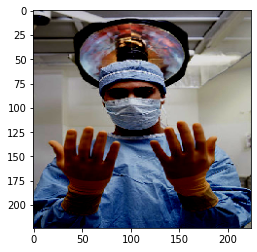

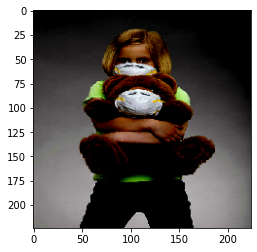

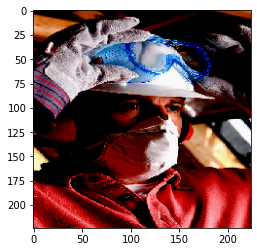

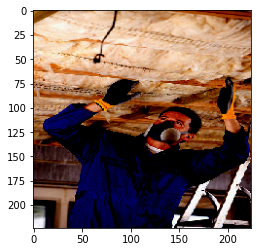

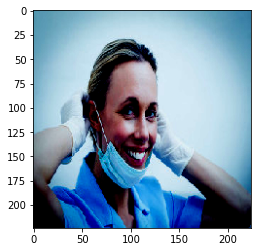

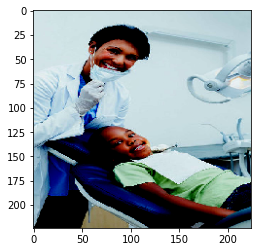

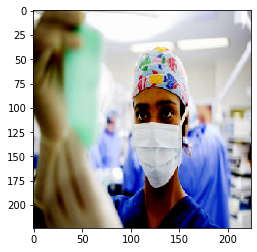

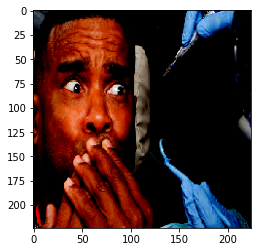

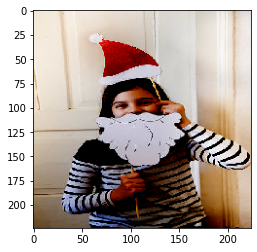

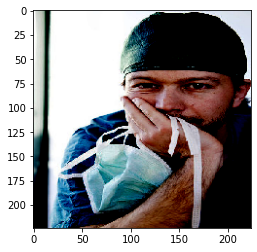

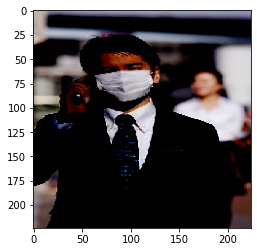

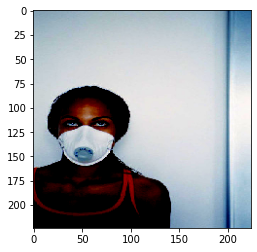

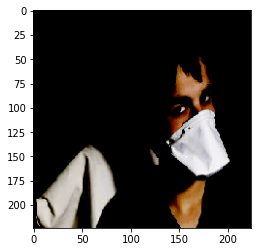

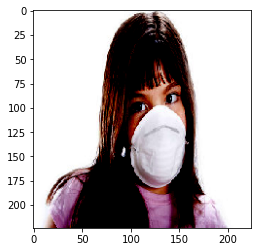

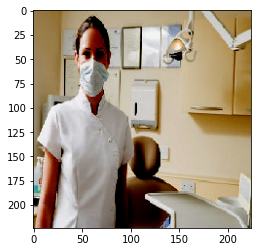

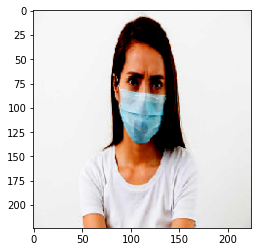

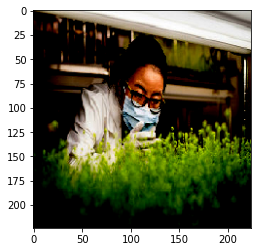

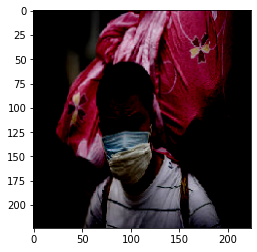

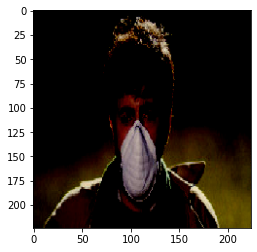

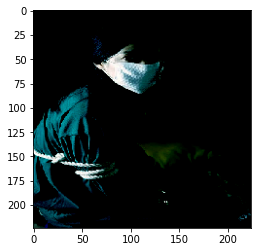

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for i in range(20):
  plt.figure()
  plt.imshow(data[i])


In [ ]:
with open("/content/drive/MyDrive/MAFA1/trainL/readme-train.txt" , "r") as file:
  for line in file.readlines():
    print(line)

MAFA training set

1) images folder puts the 25876 image files; 

2) the label is stored in LabelTrainAll.mat,

3) the format is stored in a 18d array (x,y,w,h, x1,y1,x2,y2, x3,y3,w3,h3, occ_type, occ_degree, gender, race, orientation, x4,y4,w4,h4),  where        (a) (x,y,w,h) is the bounding box of a face, 

    (b) (x1,y1,x2,y2) is the position of two eyes.

    (c) (x3,y3,w3,h3) is the bounding box of the occluder. Note that (x3,y3) is related to the face bounding box position (x,y)

    (d) occ_type stands for the occluder type and has: 1 for simple, 2 for complex and 3 for human body.

    (e) occ_degree stands for the number of occluded face parts

    (f) gender and race stand for the gender and race of one face

    (g) orientation stands for the face orientation/pose, and has: 1-left, 2-left frontal, 3-frontal, 4-right frontal, 5-right

    (h) (x4,y4,w4,h4) is the bounding box of the glasses and is set to (-1,-1,-1,-1) when no glasses.  Note that (x4,y4) is related to the fac

In [ ]:
with open("/content/drive/MyDrive/MAFA1/testL/readme-test.txt" , "r") as file:
  for line in file.readlines():
    print(line)

MAFA testing set

1) images folder puts the 4935 image files; 

2) the label is stored in LabelTestAll.mat,

3) the format is stored in a 18d array (x,y,w,h,face_type,x1,y1,w1,h1, occ_type, occ_degree, gender, race, orientation, x2,y2,w2,h2),  where              (a) (x,y,w,h) is the bounding box of a face, 

    (b) face_type stands for the face type and has: 1 for masked face, 2 for unmasked face and 3 for invalid face.

    (c) (x1,y1,w1,h1) is the bounding box of the occluder. Note that (x1,y1) is related to the face bounding box position (x,y)

    (d) occ_type stands for the occluder type and has: 1 for simple, 2 for complex and 3 for human body.

    (e) occ_degree stands for the number of occluded face parts

    (f) gender and race stand for the gender and race of one face

    (g) orientation stands for the face orientation/pose, and has: 1-left, 2-left frontal, 3-frontal, 4-right frontal, 5-right

    (h) (x2,y2,w2,h2) is the bounding box of the glasses and is set to (-1,-1,-

In [ ]:
import scipy.io
train_mat = scipy.io.loadmat('/content/drive/MyDrive/MAFA1/trainL/LabelTrainAll.mat')

In [ ]:
box = train_mat['label_train'][0][219][2][0][:4]
label  = train_mat['label_train'][0][219][2][0][12]

box , label

(array([ 38,  84, 229, 229], dtype=int16), 1)

In [3]:
import numpy as np

# df = np.load("/content/mafa.npy" , allow_pickle=True)
label= np.load("/content/mafalabels.npy" , allow_pickle=True)
np.save("/content/drive/MyDrive/labeldf.npy" , label)

In [2]:
np.save("/content/drive/MyDrive/data.npy" , df)